In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn as sns


In [2]:
!pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB ? eta -:--:--
    --------------------------------------- 0.8/38.5 MB 1.8 MB/s eta 0:00:21
   - -------------------------------------- 1.6/38.5 MB 2.0 MB/s eta 0:00:19
   -- ------------------------------------- 2.1/38.5 MB 2.0 MB/s eta 0:00:19
   -- ------------------------------------- 2.6/38.5 MB 2.1 MB/s eta 0:00:18
   --- ------------------------------------ 3.4/38.5 MB 2.2 MB/s eta 0:00:17
   ---- ----------------------------------- 3.9/38.5 MB 2.2 MB/s eta 0:00:16
   ---- ----------------------------------- 4.7/38.5 MB 2.3 MB/s eta 0:00:15
   ----- ---------------------------------- 5.5/38.5 MB 2.4 MB/s eta 0:00:14
   ------ --------------------------------- 6.0/38.5 MB 2.4 MB/s eta 0:00:14
   ------- -------------------------------- 6.8/38.5 MB 2.5 MB/s eta 0:00:13
   -------- ------------------------------- 7.9/38.5 MB 2.6 MB/s eta 0:00:12
   -------- -


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Objective:
# Model the number of server crashes per month using Poisson distribution

# Suppose historical data shows an average of 2 crashes per month
lambda_val = 2  # λ = average rate of crashes per month

# Range of possible crash counts (0 to 10)
x = np.arange(0, 11)

x


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [3]:
# Probability Mass Function (PMF): P(X = k)
pmf_values = poisson.pmf(x, lambda_val)

# Cumulative Distribution Function (CDF): P(X ≤ k)
cdf_values = poisson.cdf(x, lambda_val)

# Display PMF and CDF values
import pandas as pd
prob_table = pd.DataFrame({
    'Crashes (k)': x,
    'P(X = k)': np.round(pmf_values, 4),
    'P(X ≤ k)': np.round(cdf_values, 4)
})
prob_table


,Crashes (k),P(X = k),P(X ≤ k)
0,0,0.1353,0.1353
1,1,0.2707,0.4060
2,2,0.2707,0.6767
3,3,0.1804,0.8571
4,4,0.0902,0.9473
5,5,0.0361,0.9834
6,6,0.0120,0.9955
7,7,0.0034,0.9989
8,8,0.0009,0.9998
9,9,0.0002,1.0000


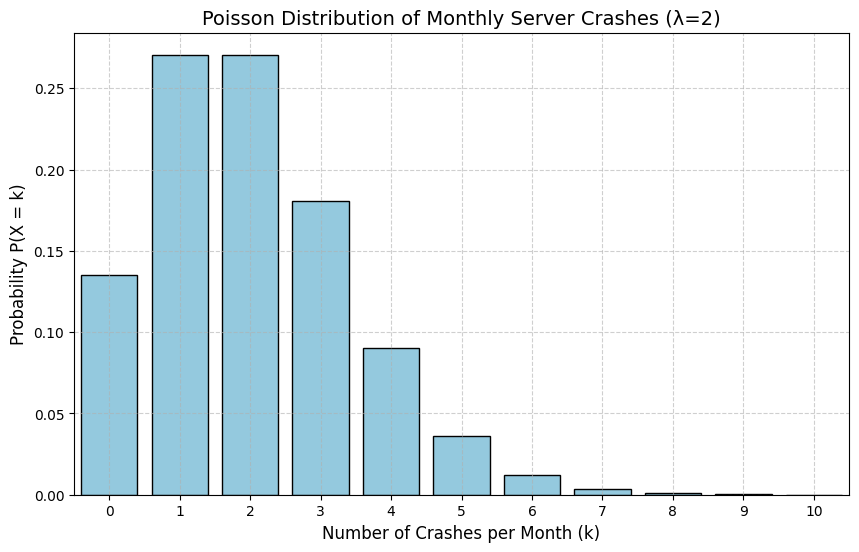

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(x=x, y=pmf_values, color='skyblue', edgecolor='black')

plt.title('Poisson Distribution of Monthly Server Crashes (λ=2)', fontsize=14)
plt.xlabel('Number of Crashes per Month (k)', fontsize=12)
plt.ylabel('Probability P(X = k)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [5]:
# Probability of exactly 3 crashes in a month
p_3 = poisson.pmf(3, lambda_val)

# Probability of at most 3 crashes in a month
p_at_most_3 = poisson.cdf(3, lambda_val)

# Probability of more than 3 crashes in a month
p_more_than_3 = 1 - poisson.cdf(3, lambda_val)

print(f"P(X = 3)   = {p_3:.4f}")
print(f"P(X ≤ 3)   = {p_at_most_3:.4f}")
print(f"P(X > 3)   = {p_more_than_3:.4f}")


P(X = 3)   = 0.1804
P(X ≤ 3)   = 0.8571
P(X > 3)   = 0.1429
